# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, fbeta_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
#Read the data set and save it in dataframe
df= pd.read_csv('Telco-Customer.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA 

In [4]:
#Null values
df.isna().sum()/len(df) * 100.00

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [10]:
df.Churn = (df.Churn == 'yes').astype(int)

In [11]:
df.Churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [12]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [13]:
df[df.Churn==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
6,1452-kiovk,male,0,no,yes,22,yes,yes,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,credit_card_(automatic),89.10,1949.40,0
7,6713-okomc,female,0,no,no,10,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,no,mailed_check,29.75,301.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-wgero,female,0,no,no,72,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,yes,bank_transfer_(automatic),21.15,1419.40,0
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.50,0
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.90,0
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,0


In [14]:
# to explore features according to churn
def explore_feature(feature):
    group= df.groupby(feature).mean()
    plots = group.Churn.sort_values().plot(kind = 'bar', fontsize=15)
    plots.title.set_size(40);
    plt.xlabel(feature, fontsize=15);
    plt.ylabel('% Churn', fontsize=15);
    plt.title("% Churn according to {} feature\n".format(feature), fontsize=20)
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=15, xytext=(0, 8),
                       textcoords='offset points')

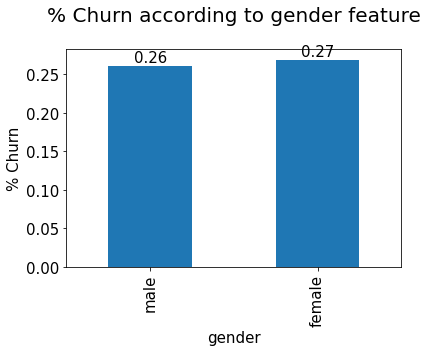

In [15]:
explore_feature('gender')

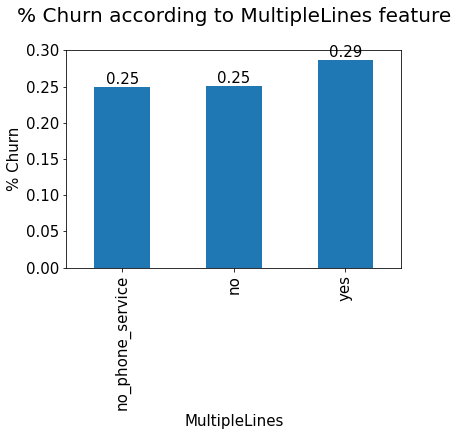

In [16]:
explore_feature('MultipleLines')

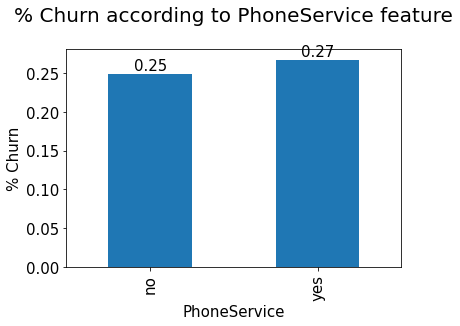

In [17]:
explore_feature('PhoneService')

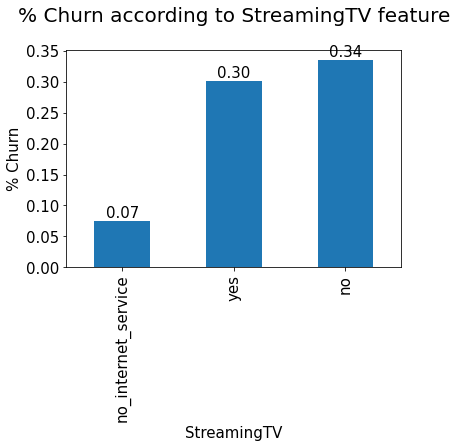

In [18]:
explore_feature('StreamingTV')

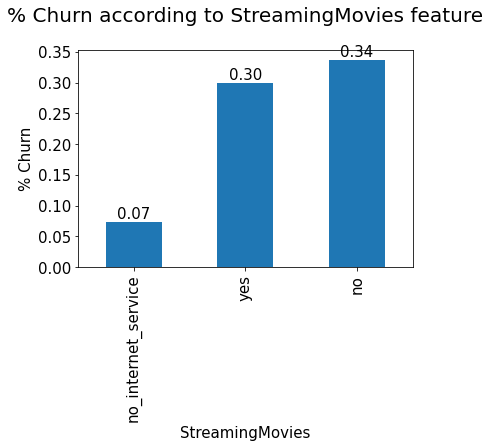

In [19]:
explore_feature('StreamingMovies')

In [20]:
counts = df['Churn'].value_counts()

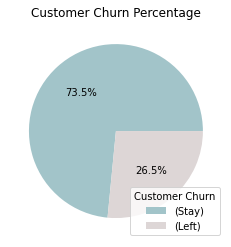

In [21]:
# plotting with target feature
colors = ['#a2c4c9','#DDD6D6']
fig, ax = plt.subplots()
ax.pie(counts , autopct='%1.1f%%',colors =colors)
ax.legend(labels=['(Stay)', '(Left)'], title='Customer Churn',loc='lower right')
ax.set_title("Customer Churn Percentage")
plt.show()
fig.savefig('churn.png')

In [22]:
l1 = df.loc[df['Churn']== 'Yes'].count()[0]
print(f"Pecentage of Left: {l1/len(df['Churn'])}")
print(df.Churn.value_counts())

Pecentage of Left: 0.0
0    5174
1    1869
Name: Churn, dtype: int64


#1869 of customer are left about 26.5 percentage from overall, this like an imbalance dataset

# Feature Engineering

In [23]:
df.drop(['customerID'], axis=1, inplace=True)

In [24]:
df.drop(['StreamingTV', 'StreamingMovies'], axis=1, inplace=True)

In [25]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [26]:
df.gender = df.gender.replace(['male','female'], [0,1])
df.Partner= df.Partner.replace(['no','yes'],[0,1])
df.Dependents= df.Dependents.replace(['no','yes'],[0,1])
df.PhoneService= df.PhoneService.replace(['no','yes'],[0,1])
df.PaperlessBilling= df.PaperlessBilling.replace(['no','yes'],[0,1])

In [27]:
df.InternetService = df.InternetService.replace(['dsl', 'fiber_optic', 'no'],[1,2,0])

df.MultipleLines = df.MultipleLines.replace(['no', 'yes' ,'no_phone_service'],[0,1,0])

df.TechSupport = df.TechSupport.replace(['no', 'yes' ,'no_internet_service'],[0,1,0])

df.DeviceProtection = df.DeviceProtection.replace(['no', 'yes' ,'no_internet_service'],[0,1,0])

df.OnlineSecurity = df.OnlineSecurity.replace(['no', 'yes' ,'no_internet_service'],[0,1,0])

df.Contract = df.Contract.replace(['month-to-month', 'one_year' ,'two_year'],[0,1,2])

df.PaymentMethod = df.PaymentMethod.replace(['electronic_check', 'mailed_check' ,'bank_transfer_(automatic)'
 ,'credit_card_(automatic)'],[0,1,2,3])

df.OnlineBackup = df.OnlineBackup.replace(['yes', 'no' ,'no_internet_service'],[0,1,2])


In [28]:
df['TotalCharges'].fillna((df['TotalCharges'].mean()), inplace=True)

In [29]:
# create function to calculate the models scores
def mdl_score(actual,preds, bta = 2):
    '''
    A function to score the model
    '''  
    print("The accuarcy score is",accuracy_score(actual, preds))
    print("The f1 score is",f1_score(actual, preds))
    print("The precision score is",precision_score(actual, preds))
    print("The recall score is",recall_score(actual, preds))
    f_bta = fbeta_score(actual, preds, beta=bta)
    print("The fbeta of", bta,"score is", f_bta)
    return f_bta

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data
train, test= train_test_split(df, test_size=0.1, random_state = 42, shuffle=True,stratify=df.Churn)
train, val = train_test_split(train, test_size=0.16, random_state = 42, shuffle=True,stratify=train.Churn)
def Log_reg(train,val):
    '''
    A function to model logistic regression using the train data 
    and print scores for train and validation
    
    return 
        trained model
    '''  
    LR = LogisticRegression(max_iter = 1000, random_state = 42)
    LR.fit(train.drop("Churn", axis=1) ,train.Churn)
    
    print("Train Scores:")
    preds = LR.predict(train.drop("Churn", axis=1))
    mdl_score(train.Churn,preds)
    
    print("-----------------------------------------------")
    print("\nValidation scores:")
    preds_val = LR.predict(val.drop("Churn", axis=1))
    mdl_score(val.Churn,preds_val)
    return LR

In [31]:
#baseline model
Log_reg(train,val)

Train Scores:
The accuarcy score is 0.8053729100131505
The f1 score is 0.6063829787234042
The precision score is 0.6546349466776046
The recall score is 0.564755838641189
The fbeta of 2 score is 0.580701499053995
-----------------------------------------------

Validation scores:
The accuarcy score is 0.7970443349753694
The f1 score is 0.5795918367346939
The precision score is 0.6425339366515838
The recall score is 0.5278810408921933
The fbeta of 2 score is 0.5474171164225136


LogisticRegression(max_iter=1000, random_state=42)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  Contract          7043 non-null   int64  
 13  PaperlessBilling  7043 non-null   int64  
 14  PaymentMethod     7043 non-null   int64  
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7043 non-null   float64


In [33]:
# See Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
X=df.drop(['Churn'], axis=1)
Y=df['Churn']

In [34]:
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.0369483  0.02410945 0.03157984 0.02706174 0.17999844 0.00774583
 0.0250891  0.06893006 0.02743389 0.0377012  0.02818063 0.02614231
 0.069155   0.03192394 0.06480886 0.14949698 0.16369445]


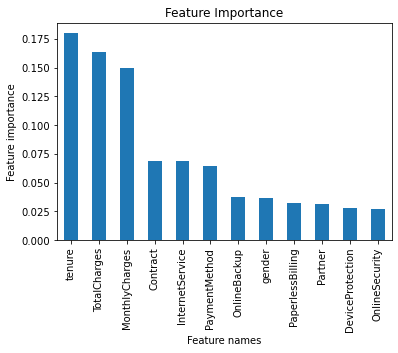

In [35]:
feat_importances = pd.Series(model.feature_importances_, index= X.columns)
feat_importances.nlargest(12).plot(kind='bar')
plt.title("Feature Importance")
plt.xlabel("Feature names")
plt.ylabel("Feature importance");
plt.savefig('feature importance.png')

In [36]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [37]:
df.drop(['SeniorCitizen','Partner','Dependents','OnlineSecurity','DeviceProtection'], axis=1, inplace= True)
df.drop(['PhoneService','MultipleLines'], axis= 1, inplace = True)

In [38]:
# Now see the correlation between churn and all of the columns.
df.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
PaymentMethod      -0.262818
TotalCharges       -0.199428
TechSupport        -0.164674
OnlineBackup       -0.074205
gender              0.008612
PaperlessBilling    0.191825
MonthlyCharges      0.193356
InternetService     0.316846
Churn               1.000000
Name: Churn, dtype: float64

In [39]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [40]:

# expr 1 random down sample
import imblearn.under_sampling

us = imblearn.under_sampling.RandomUnderSampler()
X, y = us.fit_resample(train.drop("Churn", axis=1)
      ,train.Churn )

train_us = pd.concat([X,y], axis=1)
train.Churn.value_counts()

0    3910
1    1413
Name: Churn, dtype: int64

In [41]:
Log_reg(train_us,val)

Train Scores:
The accuarcy score is 0.7707006369426752
The f1 score is 0.7789904502046383
The precision score is 0.7518104015799868
The recall score is 0.808209483368719
The fbeta of 2 score is 0.7962627248640357
-----------------------------------------------

Validation scores:
The accuarcy score is 0.7359605911330049
The f1 score is 0.6246498599439776
The precision score is 0.501123595505618
The recall score is 0.828996282527881
The fbeta of 2 score is 0.7330703484549638


LogisticRegression(max_iter=1000, random_state=42)

In [42]:
# expr 2 random up sample
import imblearn.under_sampling

up = imblearn.over_sampling.RandomOverSampler()
X_up, y_up = up.fit_resample(train.drop("Churn", axis=1)
      ,train.Churn )

train_up = pd.concat([X_up,y_up], axis=1)
train_up.Churn.value_counts()

0    3910
1    3910
Name: Churn, dtype: int64

In [43]:
Log_reg(train_up,val)


Train Scores:
The accuarcy score is 0.7609974424552429
The f1 score is 0.7714320655497126
The precision score is 0.739161003046637
The recall score is 0.8066496163682865
The fbeta of 2 score is 0.7921836539910584
-----------------------------------------------

Validation scores:
The accuarcy score is 0.7389162561576355
The f1 score is 0.6293706293706294
The precision score is 0.5044843049327354
The recall score is 0.8364312267657993
The fbeta of 2 score is 0.7391590013140605


LogisticRegression(max_iter=1000, random_state=42)

In [76]:
# expr 3 KNN Algorithm
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train.drop(['Churn'], axis=1), train.Churn)
y_pred = knn.predict(val.drop(['Churn'], axis=1))
mdl_score(val.Churn, y_pred)

The accuarcy score is 0.7566502463054188
The f1 score is 0.5050100200400801
The precision score is 0.5478260869565217
The recall score is 0.4684014869888476
The fbeta of 2 score is 0.48238897396630936


0.48238897396630936

Train Scores:
The accuarcy score is 0.8053729100131505
The f1 score is 0.6063829787234042
The precision score is 0.6546349466776046
The recall score is 0.564755838641189
The fbeta of 2 score is 0.580701499053995
-----------------------------------------------

Validation scores:
The accuarcy score is 0.7970443349753694
The f1 score is 0.5795918367346939
The precision score is 0.6425339366515838
The recall score is 0.5278810408921933
The fbeta of 2 score is 0.5474171164225136
[[1263  150]
 [ 615  798]]


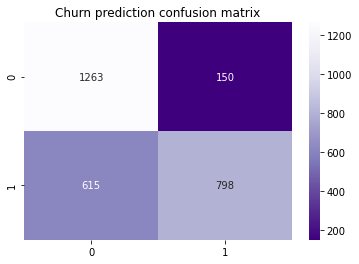

In [46]:
# Confusion matrix for linear regression
from sklearn.metrics import confusion_matrix
#Fit the model
logreg=Log_reg(train,val)
#Generate predictions with the model using our X values
y_pred = logreg.predict(X)
#Get the confusion matrix
cf_matrix = confusion_matrix(y, y_pred)
print(cf_matrix)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True,  fmt='d', cmap='Purples_r')
plt.title(label="Churn prediction confusion matrix", loc='center' )
plt.savefig('heat')

In [64]:
# expr 4 Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100, min_samples_leaf=3)
rf.fit(train.drop('Churn', axis=1), train.Churn)

RandomForestClassifier(min_samples_leaf=3)

In [65]:
train_preds= rf.predict(train.drop('Churn', axis=1))
val_preds=rf.predict(val.drop('Churn', axis=1))

In [70]:
val_preds_prob=rf.predict_proba(val.drop('Churn', axis=1))

In [66]:
mdl_score(train.Churn, train_preds, bta=2)

print("\n validation scores: \n")

mdl_score(val.Churn, val_preds, bta=2)

The accuarcy score is 0.9075709186548938
The f1 score is 0.8090062111801244
The precision score is 0.8959587274290628
The recall score is 0.7374380750176929
The fbeta of 2 score is 0.7644900953778431

 validation scores: 

The accuarcy score is 0.787192118226601
The f1 score is 0.5404255319148937
The precision score is 0.6318407960199005
The recall score is 0.4721189591078067
The fbeta of 2 score is 0.49725920125293666


0.49725920125293666

In [67]:
from sklearn.metrics import precision_recall_curve

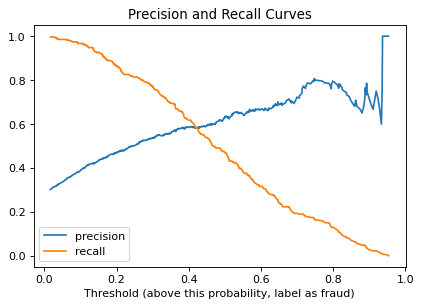

In [72]:
# Recall and precision curves
precision_curve, recall_curve, threshold_curve = precision_recall_curve(val.Churn, val_preds_prob[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [74]:
val_preds_prob <0.4

array([[False,  True],
       [False,  True],
       [False,  True],
       ...,
       [ True, False],
       [ True, False],
       [False,  True]])

In [87]:
model_list = [knn,rf]

In [88]:
# expr 5 Stacking Classifier 

from mlxtend.classifier import StackingClassifier

stacked = StackingClassifier(
    classifiers=model_list, meta_classifier=LogisticRegression(), use_probas=False)

stacked.fit(train.drop("Churn", axis=1)
       ,train.Churn)
y_pred = stacked.predict(val.drop('Churn' , axis=1))
accuracy_score(val['Churn'], y_pred)


0.7891625615763547

In [89]:
mdl_score(val['Churn'], y_pred)

The accuarcy score is 0.7891625615763547
The f1 score is 0.5407725321888411
The precision score is 0.6395939086294417
The recall score is 0.4684014869888476
The fbeta of 2 score is 0.4948939512961509


0.4948939512961509

In [80]:
!pip install mlxtend
